# Uber Data Analysis

## Importing Libraries & Data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()


In [2]:
df = pd.read_csv('UberDataset.csv')

## Data Understanding

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Data Cleaning

In [5]:
df['PURPOSE'] = df['PURPOSE'].fillna('UNKNOWN')

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


## Data Preprocessing

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
# converting START_DATE and END_DATE into datetime format
df['start_date'] = pd.to_datetime(df['start_date'], format='mixed')
df['end_date'] = pd.to_datetime(df['end_date'], format='mixed')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  1155 non-null   datetime64[ns]
 1   end_date    1155 non-null   datetime64[ns]
 2   category    1155 non-null   object        
 3   start       1155 non-null   object        
 4   stop        1155 non-null   object        
 5   miles       1155 non-null   float64       
 6   purpose     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [13]:
# Create new feature representing the hour of the ride
df['time_day'] = df['start_date'].dt.hour

# Create new feature representing time of the ride - morning, afternoon, evening, night
df['time_of_day'] = pd.cut(
    x = df['time_day'],
    bins = [0, 6, 11, 17, 21, 24],
    labels = ['night', 'morning', 'afternoon', 'evening', 'night'],
    ordered = False
)
#create new feature representing month of the ride
df['month_of_the_ride'] = df['start_date'].apply(lambda i : i.month)
month_label = {1.0 : 'Jan' , 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0:'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df['month_of_the_ride'] = df['month_of_the_ride'].map(month_label) 
#create new feature representing day (week) of the ride
df['day_of_the_ride'] = df['start_date'].apply(lambda i : i.weekday())
day_lable = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day_of_the_ride'] = df['day_of_the_ride'].map(day_lable)
# duration of the ride
df['duration_of_the_ride'] = ((df['end_date'] - df['start_date']).dt.total_seconds() / 60).astype(int)

In [14]:
df.head(10)

,start_date,end_date,category,start,stop,miles,purpose,time_day,time_of_day,month_of_the_ride,day_of_the_ride,duration_of_the_ride
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,evening,Jan,Fri,6
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,night,Jan,Sat,12
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,evening,Jan,Sat,13
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,afternoon,Jan,Tues,14
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,afternoon,Jan,Wed,67
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,afternoon,Jan,Wed,4
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,17,afternoon,Jan,Wed,5
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,13,afternoon,Jan,Thus,6
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,8,morning,Jan,Sun,20
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,12,afternoon,Jan,Sun,27


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   start_date            1155 non-null   datetime64[ns]
 1   end_date              1155 non-null   datetime64[ns]
 2   category              1155 non-null   object        
 3   start                 1155 non-null   object        
 4   stop                  1155 non-null   object        
 5   miles                 1155 non-null   float64       
 6   purpose               1155 non-null   object        
 7   time_day              1155 non-null   int32         
 8   time_of_day           1136 non-null   category      
 9   month_of_the_ride     1155 non-null   object        
 10  day_of_the_ride       1155 non-null   object        
 11  duration_of_the_ride  1155 non-null   int32         
dtypes: category(1), datetime64[ns](2), float64(1), int32(2), object(6)
memory usage: 

## Data Exploration


In [16]:
df.describe().round(2)

,start_date,end_date,miles,time_day,duration_of_the_ride
count,1155,1155,1155.00,1155.00,1155.00
mean,2016-07-16 23:44:33.402597376,2016-07-17 00:07:47.999999744,10.57,14.70,23.24
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.50,0.00,0.00
25%,2016-04-01 02:10:00,2016-04-01 02:35:00,2.90,12.00,10.00
50%,2016-07-21 17:17:00,2016-07-21 17:23:00,6.00,15.00,16.00
75%,2016-10-27 21:06:30,2016-10-27 21:21:00,10.40,18.00,27.50
max,2016-12-31 22:08:00,2016-12-31 23:51:00,310.30,23.00,336.00
std,NaN,NaN,21.58,4.58,27.32


In [17]:
print(f"Min Timestamp in start_date is : {df['start_date'].min()}")
print(f"Max Timestamp in start_date is : {df['start_date'].max()}")

Min Timestamp in start_date is : 2016-01-01 21:11:00
Max Timestamp in start_date is : 2016-12-31 22:08:00


In [18]:
df.head(2)

,start_date,end_date,category,start,stop,miles,purpose,time_day,time_of_day,month_of_the_ride,day_of_the_ride,duration_of_the_ride
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,evening,Jan,Fri,6
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,night,Jan,Sat,12


In [19]:
print(f'The Number of unique categories in category : {df['category'].nunique()}')
print(f'The Number of unique categories in purpose : {df['purpose'].nunique()}')
print(f'The Number of unique Location in start : {df['start'].nunique()}')
print(f'The Number of unique Location in stop : {df['stop'].nunique()}')

The Number of unique categories in category : 2
The Number of unique categories in purpose : 11
The Number of unique Location in start : 177
The Number of unique Location in stop : 188


In [20]:
df['category'].value_counts()

category
Business    1078
Personal      77
Name: count, dtype: int64

In [21]:
df['purpose'].value_counts()

purpose
UNKNOWN            502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

## Data Visualization

In [22]:
# Convert 'CATEGORY' column to categorical data tye
df['category'] = df['category'].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   start_date            1155 non-null   datetime64[ns]
 1   end_date              1155 non-null   datetime64[ns]
 2   category              1155 non-null   category      
 3   start                 1155 non-null   object        
 4   stop                  1155 non-null   object        
 5   miles                 1155 non-null   float64       
 6   purpose               1155 non-null   object        
 7   time_day              1155 non-null   int32         
 8   time_of_day           1136 non-null   category      
 9   month_of_the_ride     1155 non-null   object        
 10  day_of_the_ride       1155 non-null   object        
 11  duration_of_the_ride  1155 non-null   int32         
dtypes: category(2), datetime64[ns](2), float64(1), int32(2), object(5)
memory usage: 

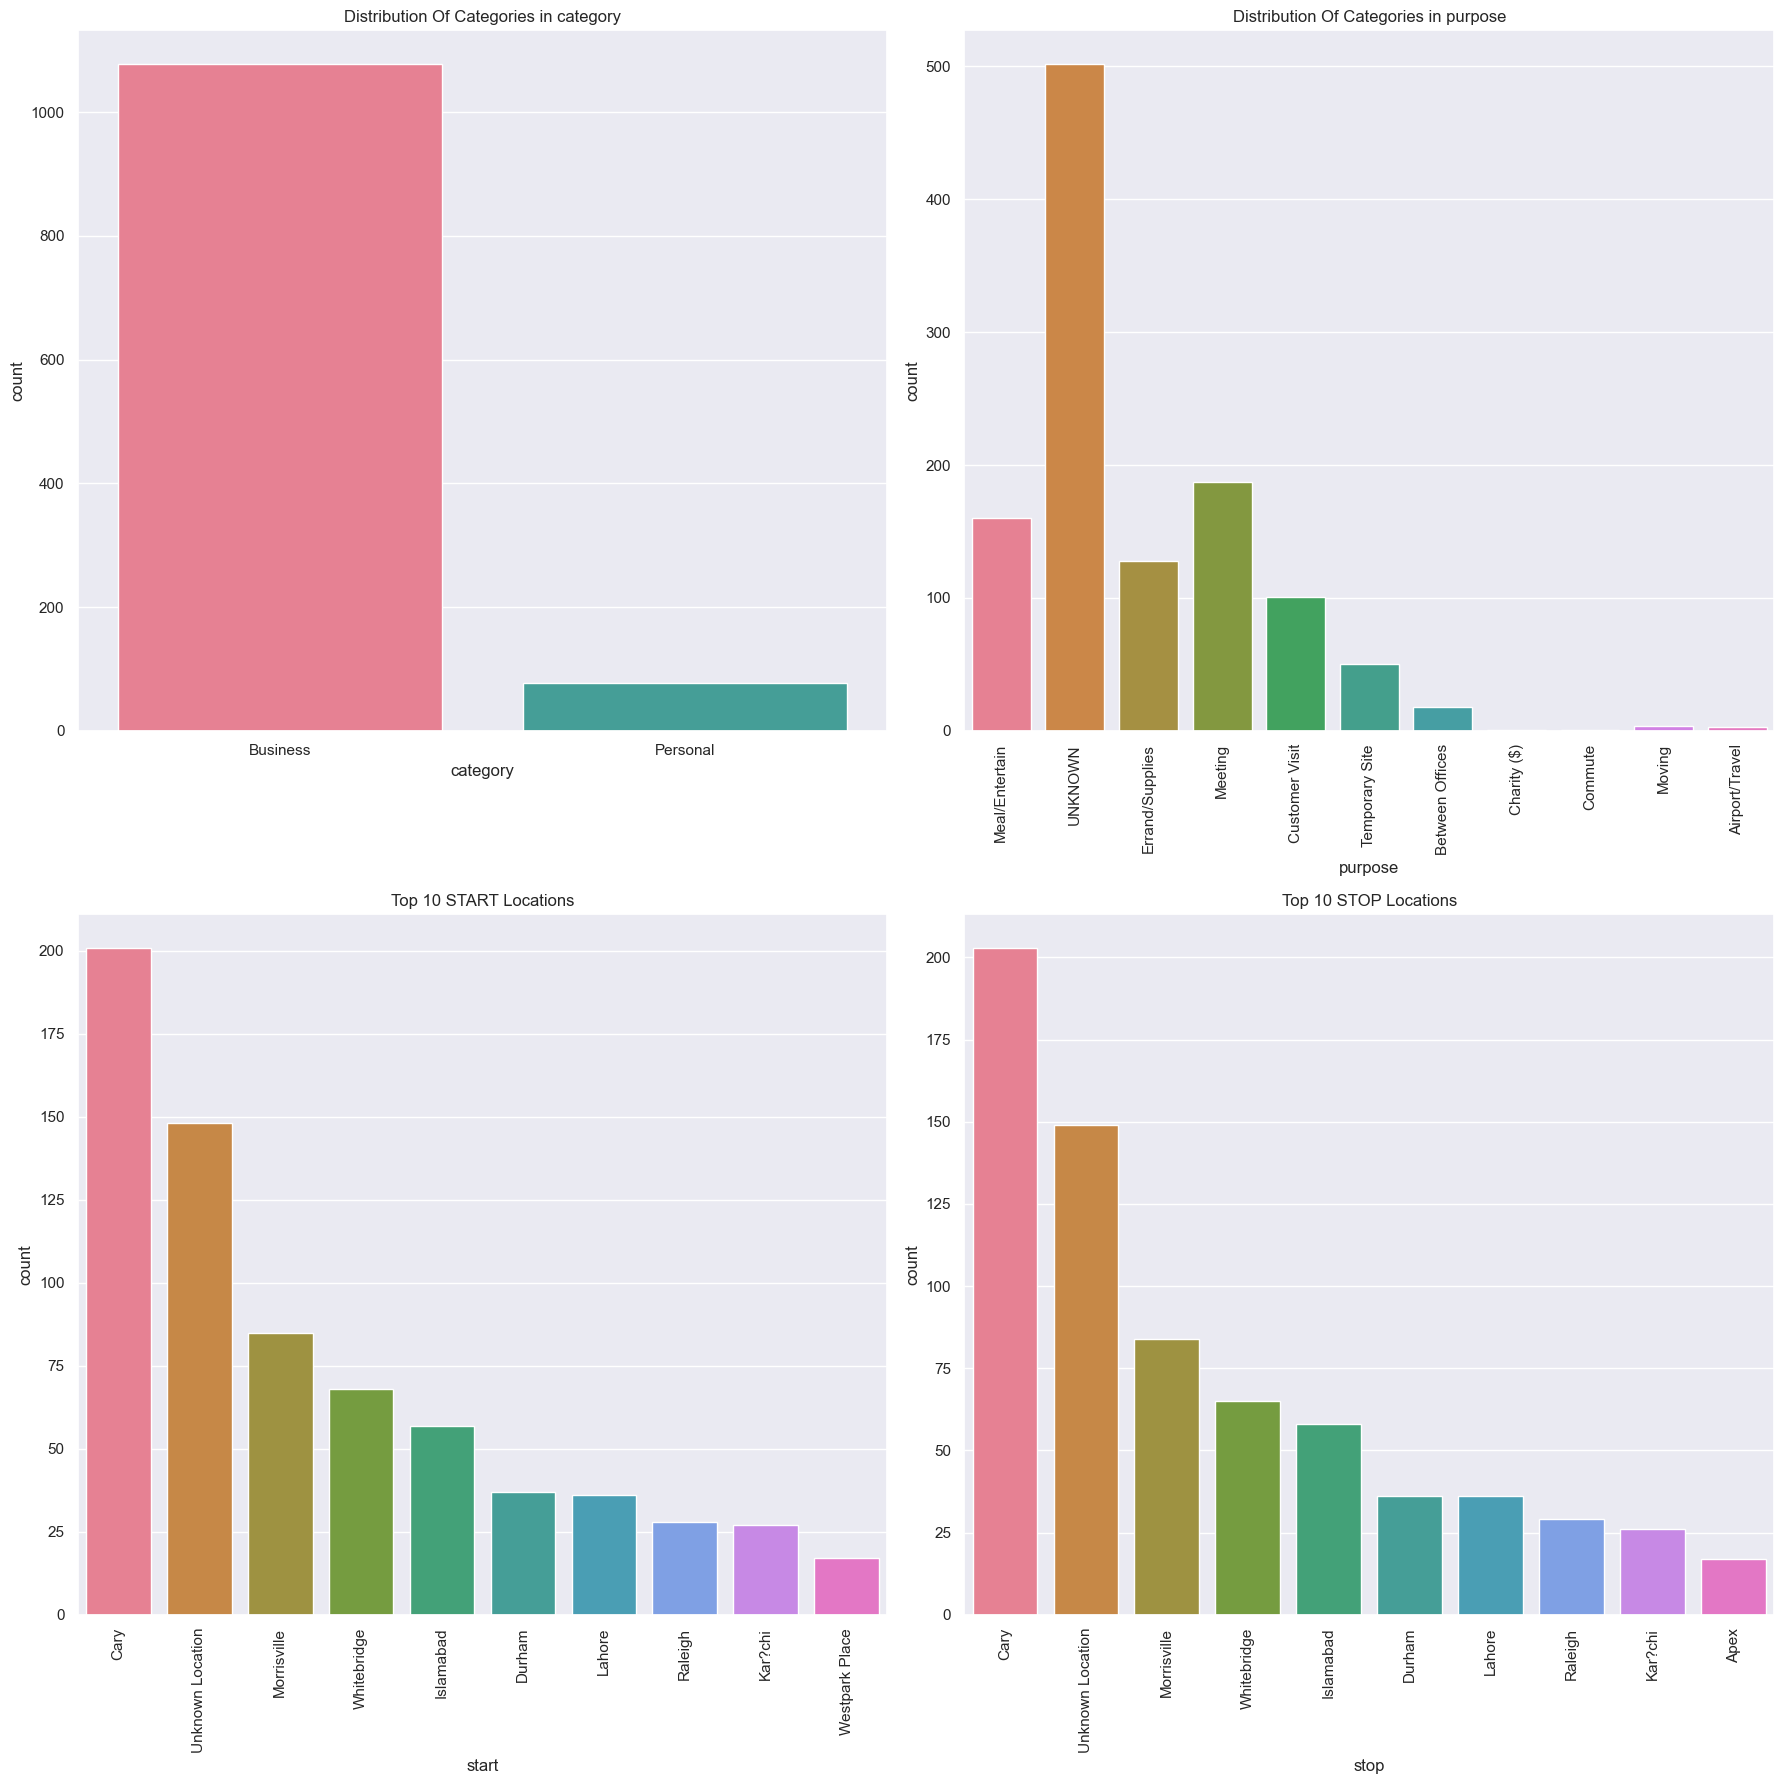

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(18, 18))

# Distribution of Categories in CATEGORY
sns.countplot(data=df, x=df['category'], ax=axes[0, 0], palette='husl')
axes[0, 0].set_title('Distribution Of Categories in category')
# Distribution of Categories in PURPOSE
sns.countplot(data=df, x= df['purpose'], ax=axes[0, 1], palette='husl')
axes[0, 1].set_title('Distribution Of Categories in purpose')
axes[0, 1].tick_params(axis='x', rotation=90)
# Top 10 locations for START
temp = df['start'].value_counts().nlargest(10).reset_index()
sns.barplot(data=temp, x='start', y='count', ax=axes[1,0], palette='husl')
axes[1, 0].set_title('Top 10 START Locations')
axes[1, 0].tick_params(axis='x', rotation=90)
# Top 10 locations for STOP
temp = df['stop'].value_counts().nlargest(10).reset_index()
sns.barplot(data=temp, x='stop', y='count', ax=axes[1, 1], palette='husl')
axes[1, 1].set_title('Top 10 STOP Locations')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [33]:
df.head(1)

,start_date,end_date,category,start,stop,miles,purpose,time_day,time_of_day,month_of_the_ride,day_of_the_ride,duration_of_the_ride
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,evening,Jan,Fri,6


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   start_date            1155 non-null   datetime64[ns]
 1   end_date              1155 non-null   datetime64[ns]
 2   category              1155 non-null   category      
 3   start                 1155 non-null   object        
 4   stop                  1155 non-null   object        
 5   miles                 1155 non-null   float64       
 6   purpose               1155 non-null   object        
 7   time_day              1155 non-null   int32         
 8   time_of_day           1136 non-null   category      
 9   month_of_the_ride     1155 non-null   object        
 10  day_of_the_ride       1155 non-null   object        
 11  duration_of_the_ride  1155 non-null   int32         
dtypes: category(2), datetime64[ns](2), float64(1), int32(2), object(5)
memory usage: 

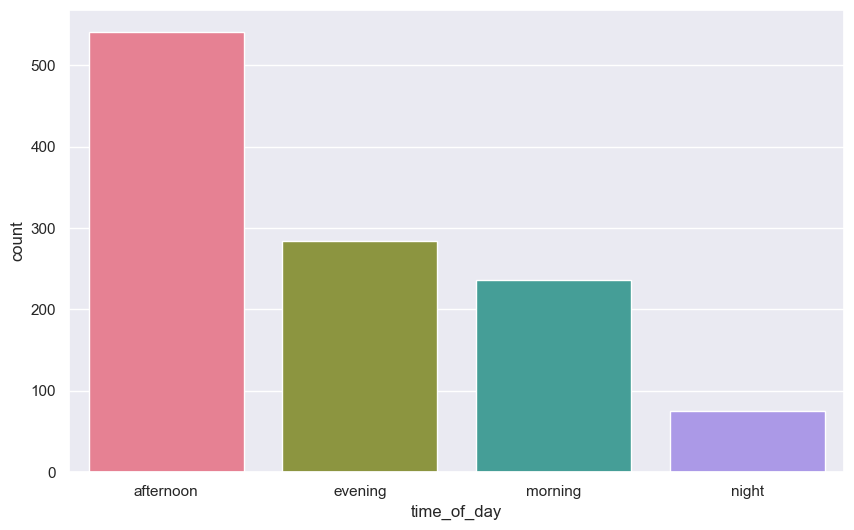

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='time_of_day', palette='husl')
plt.show()

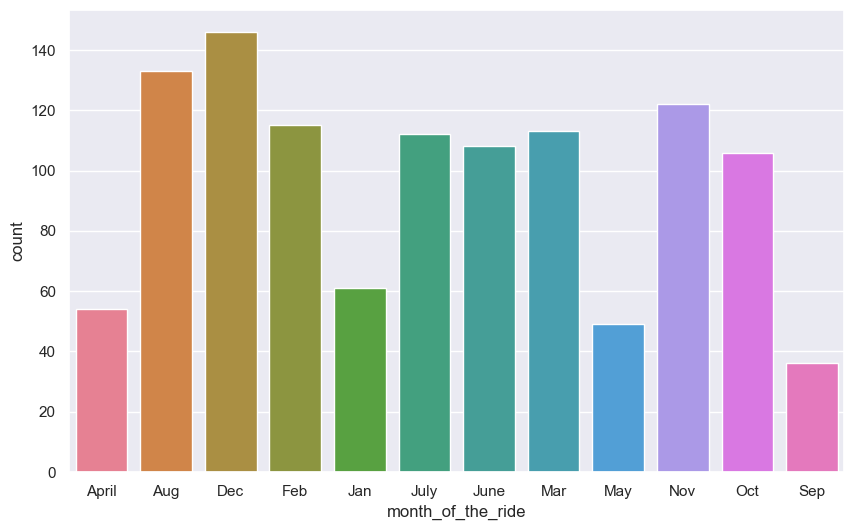

In [43]:
# Convert 'month_of_the_ride' column to categorical data type
df['month_of_the_ride'] = df['month_of_the_ride'].astype('category')

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='month_of_the_ride', palette='husl')
plt.show()

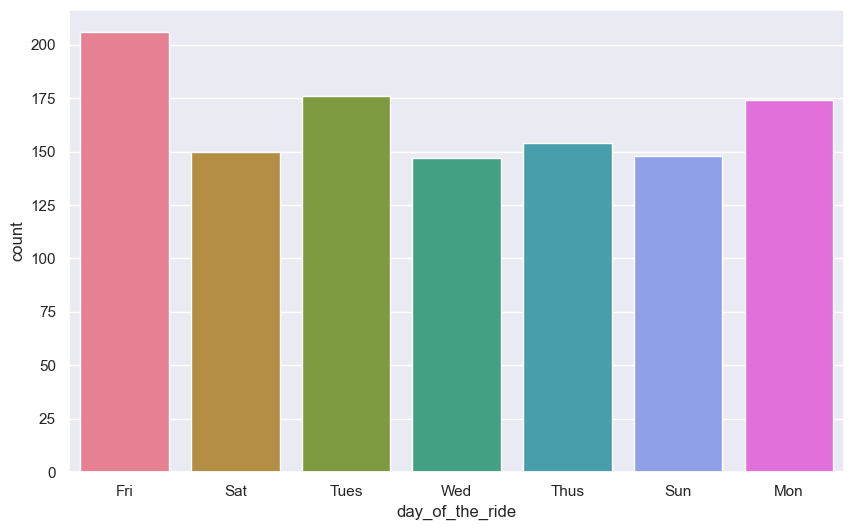

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_the_ride', palette='husl')
plt.show()     